# <center> <span style="color: #3498db">ECE 225A Project</span></center>
# <center> <span style="color: #2ecc71">Exploratory Data Analysis of the Machine Learning & Data Science Industry</span></center>
## <span style="color: #e74c3c">Team</span>
- Param Chordiya
- Mihir Gujarathi

## Introduction
Our project aims to explore and decipher the rich dataset obtained from an extensive six-year industry survey focusing on data science and machine learning. This annual survey, conducted between 2017 and 2022, amassed a wealth of diverse responses, offering a global panorama of these rapidly evolving fields. Our objective is to delve deeper into this trove of information, uncovering captivating narratives and insightful trends within specific subsets of the data science community. Through a blend of narrative text and data exploration, our endeavor is to present compelling stories that reflect the experiences, preferences, and changes within various niches of the data science realm.

## Problem Statement
The project’s primary focus revolves around understanding the evolving preferences and tool usage among diverse subsets of data science practitioners over the surveyed years. Specifically, we aim to investigate and track the changing landscape of tool adoption and preferences across different continents or regions. This exploration intends to provide a comprehensive understanding of how the utilization of tools in data science has evolved geographically, shedding light on trends and patterns unique to specific regions or communities.

## <span style="color: #3498db">**Data Source:**</span> 
[Kaggle Survey 2022 Dataset](https://www.kaggle.com/competitions/kaggle-survey-2022/data)

## Methodology

1. <span style="color: #e67e22">**Data Preprocessing:**</span> We’ll embark on a meticulous data cleaning and preprocessing phase to ensure the reliability and consistency of the survey responses.
2. <span style="color: #e74c3c">**Exploratory Data Analysis (EDA):**</span> Utilizing EDA techniques, we'll unearth trends, distributions, and changes within subsets of interest, exploring shifts in tool usage and preferences.
3. <span style="color: #2ecc71">**Visualization:**</span> Engaging visualization tools, we'll present our findings through graphical representations, facilitating a comprehensive understanding of the evolving dynamics.
4. <span style="color: #3498db">**Narrative Crafting:**</span> The insights derived from our analysis will be woven into compelling narratives that highlight the unique journeys and transformations within the chosen subsets of the data science community.

## Expected Outcome
Our project aims to produce comprehensive narratives and visual representations that vividly illustrate the evolution of tool usage and preferences within diverse data science communities across different regions. By providing detailed insights and stories, we seek to contribute to a deeper understanding of the dynamic landscape of data science and machine learning over the surveyed years.

## Conclusion
In summary, our project endeavors to unravel and showcase the diverse stories embedded within the data science community. By combining rigorous data exploration with storytelling, we aim to present compelling narratives that shed light on the evolving trends, experiences, and preferences of various subsets within the data science realm.

## Questions answered
1. What is the distribution of programming language preferences among data science practitioners?
2. What are the primary tools or platforms used by data scientists for their daily work?
3. Is there a relationship between years of experience and the adoption of machine learning techniques?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('kaggle_survey_2022_responses.csv')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_16448\2846164461.py:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kaggle_survey_2022_responses.csv')


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23994,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23996,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def replace_columns_with_first_row(df):
    """
    Replace column names in a DataFrame with the values from the first row.

    Parameters:
    - df: pandas DataFrame
        The DataFrame whose columns you want to replace.

    Returns:
    - pandas DataFrame
        The DataFrame with column names replaced by the values from the first row.
    """
    df.columns = df.iloc[0]
    # Drop the first row after using it for column names
    df = df[1:].reset_index(drop=True)
    return df

In [4]:
# Call the function to replace column names
df = replace_columns_with_first_row(df)
df

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23993,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23994,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle 

In [5]:
df.describe().T

,count,unique,top,freq
0,,,,
Duration (in seconds),23997,4328,230,59
What is your age (# years)?,23997,11,18-21,4559
What is your gender? - Selected Choice,23997,5,Man,18266
In which country do you currently reside?,23997,58,India,8792
"Are you currently a student? (high school, university, or graduate)",23997,2,No,12036
...,...,...,...,...
"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)",7766,1,"Blogs (Towards Data Science, Analytics Vidhya,...",7766
"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)",3804,1,"Journal Publications (peer-reviewed journals, ...",3804
"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",1726,1,"Slack Communities (ods.ai, kagglenoobs, etc)",1726


In [6]:
def rename_columns(df, column_mapping):
    """
    Rename columns in a DataFrame based on the provided mapping.

    Parameters:
    - df: pandas DataFrame
        The DataFrame whose columns you want to rename.
    - column_mapping: dict
        A dictionary where keys are the old column names and values are the new column names.

    Returns:
    - pandas DataFrame
        The DataFrame with renamed columns.
    """
    return df.rename(columns=column_mapping)

In [7]:
def print_column_names(df):
    """
    Print the names of each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
        The DataFrame whose column names you want to print.
    """
    list=[]
    for column_name in df.columns:
        list.append(column_name)
    return list

In [8]:
# Call the function to print column names
columns_list = print_column_names(df)
# columns_list

In [9]:
def plot_bar_chart(data_frame, columns_to_plot, title, x_axis_title="Categories", y_axis_title="Number of Users"):
    """
    Plots a bar chart based on the specified DataFrame, columns, and title.

    Parameters:
    - data_frame (pandas.DataFrame): The DataFrame containing the data to be plotted.
    - columns_to_plot (list): List of columns from the DataFrame to be included in the plot.
    - title (str): Title of the bar chart.
    - x_axis_title (str, optional): Title for the x-axis. Default is "Categories".
    - y_axis_title (str, optional): Title for the y-axis. Default is "Number of Users".

    Returns:
    None

    This function creates a copy of the DataFrame with only the selected columns, encodes
    string columns using LabelEncoder, and plots a bar chart with the counts of each category.
    The bar chart includes count labels on top of each bar, and the plot is displayed with
    specified title, x-axis title, and y-axis title.
    """
    df_selected_columns = data_frame[columns_to_plot].copy()

    # Label encode string columns
    le = LabelEncoder()
    for column in df_selected_columns.columns:
        if df_selected_columns[column].dtype == 'object':
            df_selected_columns[column] = le.fit_transform(df_selected_columns[column])

    # Count the number of users for each category
    category_counts = df_selected_columns.sum()

    # Bar plot with sky blue color
    plt.figure(figsize=(20, 15))
    barplot = sns.barplot(x=category_counts.index, y=category_counts.values, color="skyblue")
    
    # Customize plot attributes
    plt.title(title)
    plt.xlabel(x_axis_title)
    plt.ylabel(y_axis_title)
    plt.xticks(rotation=90)

    # Add count labels on top of the bars as integers
    for p in barplot.patches:
        barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

# <center> What is the distribution of programming language preferences among data science practitioners?</center>

In [10]:
columns_to_combine = [
    "What is your age (# years)?",
    "What is your gender? - Selected Choice",
    "In which country do you currently reside?",
    "Are you currently a student? (high school, university, or graduate)",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C#",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - PHP",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Go",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None",
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other"
]

df_selected_columns = df[columns_to_combine].copy()
df_selected_columns

,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C#,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - PHP,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Go,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other
0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-21,Man,Egypt,Yes,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,NaN,NaN
3,55-59,Man,France,No,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,India,Yes,Python,NaN,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,22-24,Man,United States of America,Yes,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23993,60-69,Man,United States of America,Yes,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,25-29,Man,Turkey,No,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23995,35-39,Woman,Israel,No,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def rename_columns(df, column_mapping):
    """
    Rename columns in a DataFrame based on the provided mapping.

    Parameters:
    - df: pandas DataFrame
        The DataFrame whose columns you want to rename.
    - column_mapping: dict
        A dictionary where keys are the old column names and values are the new column names.

    Returns:
    - pandas DataFrame
        The DataFrame with renamed columns.
    """
    return df.rename(columns=column_mapping)

In [12]:
cols = {
    "What is your age (# years)?":'age',
    "What is your gender? - Selected Choice":'gender',
    "In which country do you currently reside?":'country',
    "Are you currently a student? (high school, university, or graduate)":'student_status',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python":'Python',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R":'R',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL":'SQL',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C":'C',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C#":'C#',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++":'C++',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java":'Java',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript":'Javascript',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash":'Bash',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - PHP":'PHP',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB":'MATLAB',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia":'Julia',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Go":'Go',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None":'None',
    "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other":'Other'
}

df_languages=rename_columns(df_selected_columns, cols)
df_languages

,age,gender,country,student_status,Python,R,SQL,C,C#,C++,Java,Javascript,Bash,PHP,MATLAB,Julia,Go,None,Other
0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-21,Man,Egypt,Yes,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,NaN,NaN
3,55-59,Man,France,No,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,India,Yes,Python,NaN,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,22-24,Man,United States of America,Yes,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23993,60-69,Man,United States of America,Yes,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,25-29,Man,Turkey,No,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23995,35-39,Woman,Israel,No,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_languages.fillna(0, inplace=True)
df_languages

,age,gender,country,student_status,Python,R,SQL,C,C#,C++,Java,Javascript,Bash,PHP,MATLAB,Julia,Go,None,Other
0,30-34,Man,India,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30-34,Man,Algeria,No,0,0,0,0,0,0,Java,0,0,0,0,0,0,0,0
2,18-21,Man,Egypt,Yes,Python,0,SQL,C,0,0,0,0,0,0,MATLAB,0,0,0,0
3,55-59,Man,France,No,Python,0,SQL,0,0,0,0,0,Bash,0,0,0,0,0,0
4,45-49,Man,India,Yes,Python,0,0,0,0,C++,Java,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,22-24,Man,United States of America,Yes,Python,R,SQL,0,0,0,0,0,0,0,0,0,0,0,0
23993,60-69,Man,United States of America,Yes,Python,0,SQL,0,0,0,0,0,0,0,0,0,0,0,0
23994,25-29,Man,Turkey,No,Python,0,SQL,0,0,0,0,0,0,0,0,0,0,0,0
23995,35-39,Woman,Israel,No,Python,R,0,0,0,0,0,0,Bash,0,0,0,0,0,0


In [14]:
lang_list = df_languages.columns
lang_list

Index(['age', 'gender', 'country', 'student_status', 'Python', 'R', 'SQL', 'C',
       'C#', 'C++', 'Java', 'Javascript', 'Bash', 'PHP', 'MATLAB', 'Julia',
       'Go', 'None', 'Other'],
      dtype='object', name=0)

In [15]:
for i in lang_list:
    print(i,': ',df_languages[i].unique())

age :  ['30-34' '18-21' '55-59' '45-49' '70+' '22-24' '35-39' '40-44' '50-54'
 '25-29' '60-69']
gender :  ['Man' 'Woman' 'Prefer not to say' 'Nonbinary' 'Prefer to self-describe']
country :  ['India' 'Algeria' 'Egypt' 'France' 'Germany' 'Australia' 'Other'
 'South Korea' 'United States of America' 'Pakistan' 'Mexico' 'Singapore'
 'Italy' 'Taiwan' 'China' 'Argentina' 'Turkey' 'Brazil' 'Nigeria' 'Chile'
 'Japan' 'Canada' 'Indonesia' 'Israel' 'Colombia' 'Russia'
 'United Kingdom of Great Britain and Northern Ireland' 'Ethiopia'
 'South Africa' 'Viet Nam' 'Kenya' 'Spain' 'Iran, Islamic Republic of...'
 'Cameroon' 'Tunisia' 'Peru' 'Nepal' 'Morocco' 'Philippines' 'Ecuador'
 'Thailand' 'United Arab Emirates' 'Bangladesh' 'Netherlands' 'Zimbabwe'
 'Ghana' 'Portugal' 'Poland' 'Saudi Arabia' 'Romania' 'Czech Republic'
 'Malaysia' 'Sri Lanka' 'Hong Kong (S.A.R.)' 'Ukraine'
 'I do not wish to disclose my location' 'Belgium' 'Ireland']
student_status :  ['No' 'Yes']
Python :  [0 'Python']
R :  [0 '

In [16]:
def replace_non_zero(value):
    return 1 if value != 0 else 0

In [17]:
# List of columns to apply the function to
columns_to_process = ['Python', 'R', 'SQL', 'C',
       'C#', 'C++', 'Java', 'Javascript', 'Bash', 'PHP', 'MATLAB', 'Julia',
       'Go', 'None', 'Other']

# Apply the function only to the specified columns
df_languages[columns_to_process] = df_languages[columns_to_process].applymap(replace_non_zero)
df_languages

,age,gender,country,student_status,Python,R,SQL,C,C#,C++,Java,Javascript,Bash,PHP,MATLAB,Julia,Go,None,Other
0,30-34,Man,India,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30-34,Man,Algeria,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,18-21,Man,Egypt,Yes,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,55-59,Man,France,No,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,45-49,Man,India,Yes,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,22-24,Man,United States of America,Yes,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
23993,60-69,Man,United States of America,Yes,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23994,25-29,Man,Turkey,No,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23995,35-39,Woman,Israel,No,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
# Assuming 'student_status' is the column you want to modify
df_languages['student_status'] = df_languages['student_status'].replace({'Yes': 1, 'No': 0})
df_languages

,age,gender,country,student_status,Python,R,SQL,C,C#,C++,Java,Javascript,Bash,PHP,MATLAB,Julia,Go,None,Other
0,30-34,Man,India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30-34,Man,Algeria,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,18-21,Man,Egypt,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,55-59,Man,France,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,45-49,Man,India,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,22-24,Man,United States of America,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
23993,60-69,Man,United States of America,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23994,25-29,Man,Turkey,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23995,35-39,Woman,Israel,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


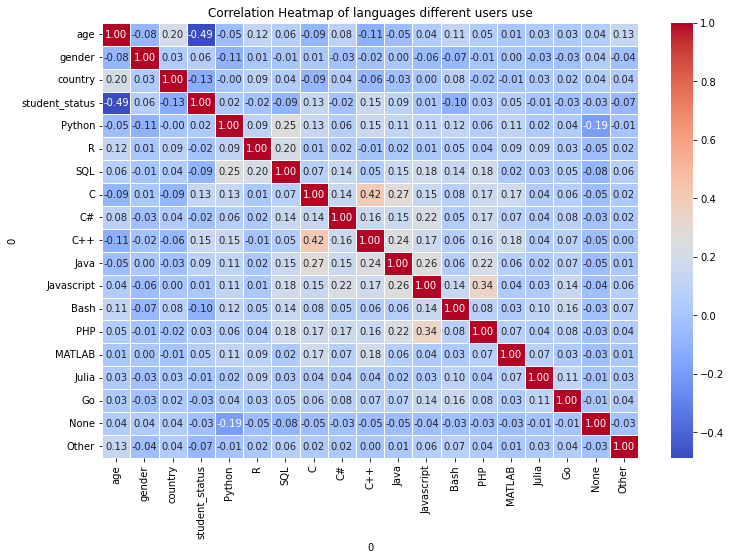

In [19]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df_languages.copy()

# Label encode string columns
le = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  # Check if the column contains string values
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of languages different users use')
plt.show()

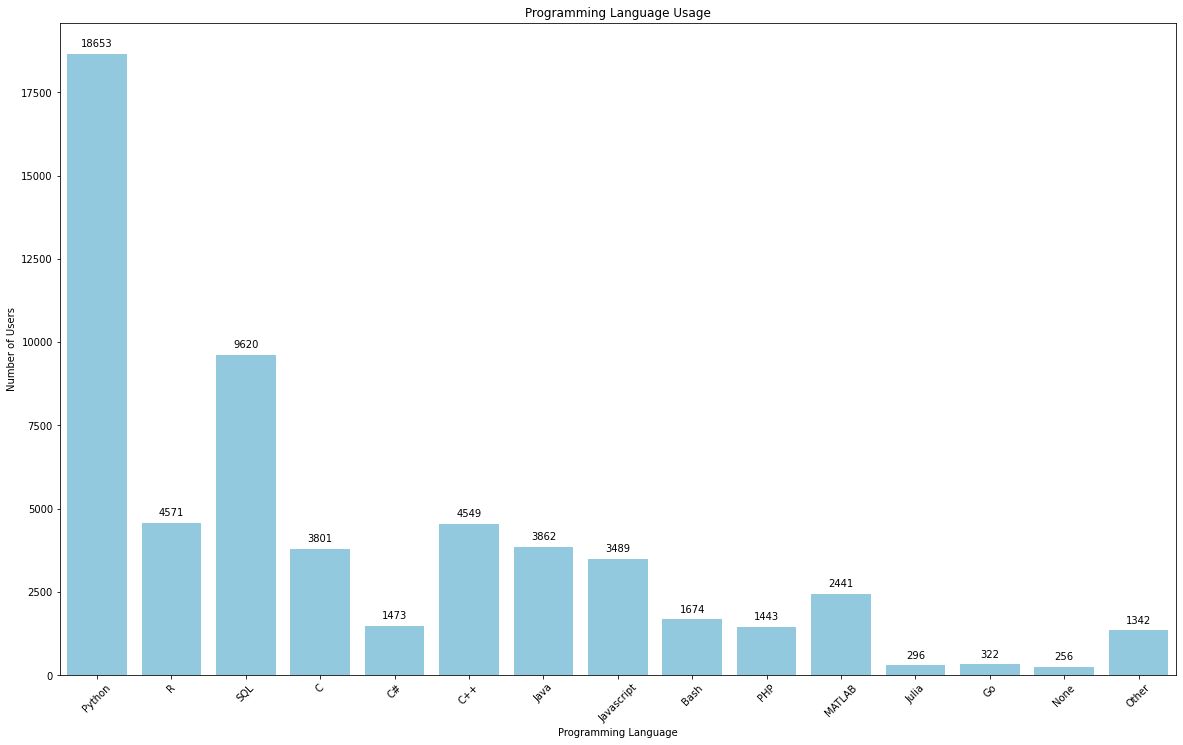

In [20]:
# Specify the columns you want to include in the plot
columns_to_plot = ['Python', 'R', 'SQL', 'C',
       'C#', 'C++', 'Java', 'Javascript', 'Bash', 'PHP', 'MATLAB', 'Julia',
       'Go', 'None', 'Other']

# Create a copy of the DataFrame with only the selected columns
df_selected_columns = df_languages[columns_to_plot].copy()

# Label encode string columns
le = LabelEncoder()
for column in df_selected_columns.columns:
    if df_selected_columns[column].dtype == 'object':  # Check if the column contains string values
        df_selected_columns[column] = le.fit_transform(df_selected_columns[column])

# Count the number of users for each language
language_counts = df_selected_columns.sum()

# Bar plot for language usage with sky blue color
plt.figure(figsize=(20,12))
barplot = sns.barplot(x=language_counts.index, y=language_counts.values, color="skyblue")
plt.title("Programming Language Usage")
plt.xlabel("Programming Language")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)

# Add count labels on top of the bars as integers
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

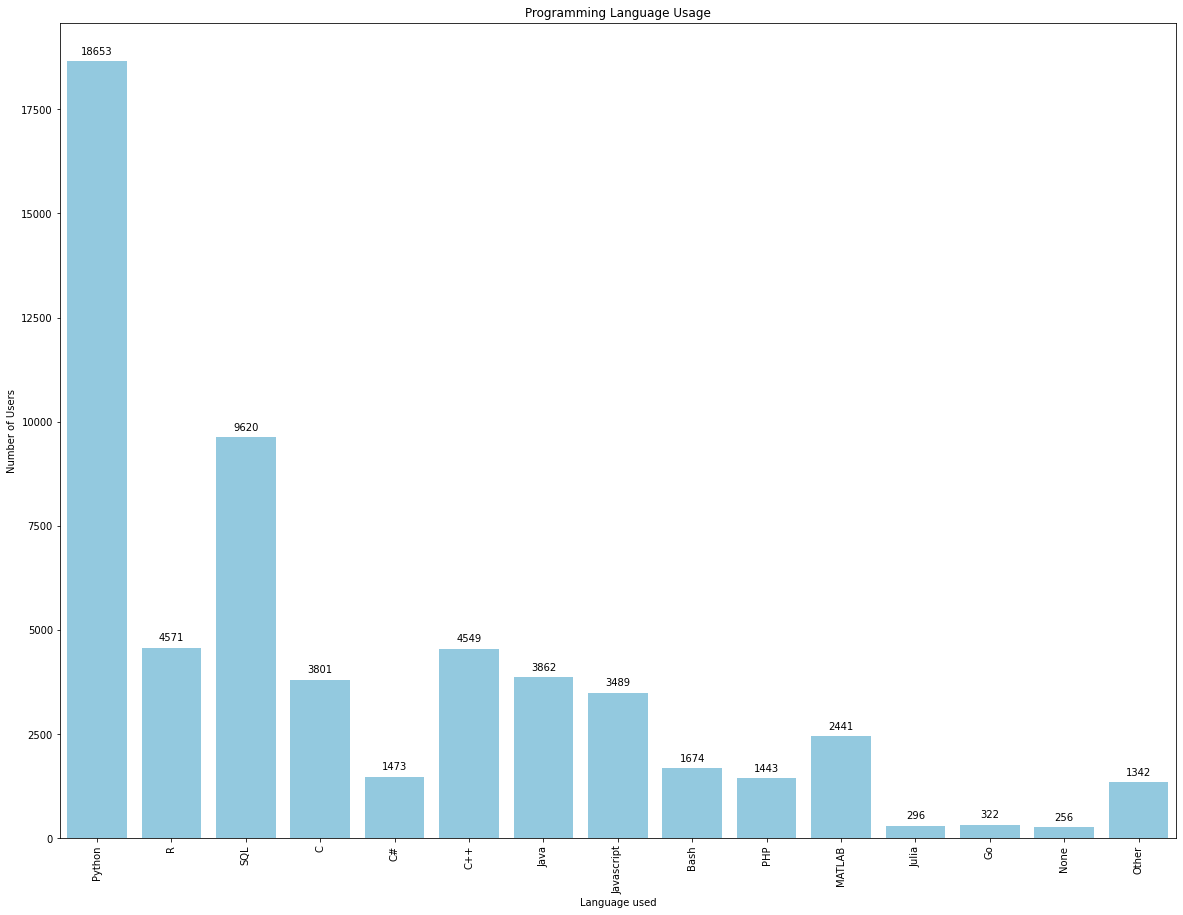

In [21]:
columns_to_plot_1 = ['Python', 'R', 'SQL', 'C',
                     'C#', 'C++', 'Java', 'Javascript', 'Bash', 'PHP', 'MATLAB', 'Julia',
                     'Go', 'None', 'Other']

plot_bar_chart(df_languages, columns_to_plot_1, "Programming Language Usage","Language used")

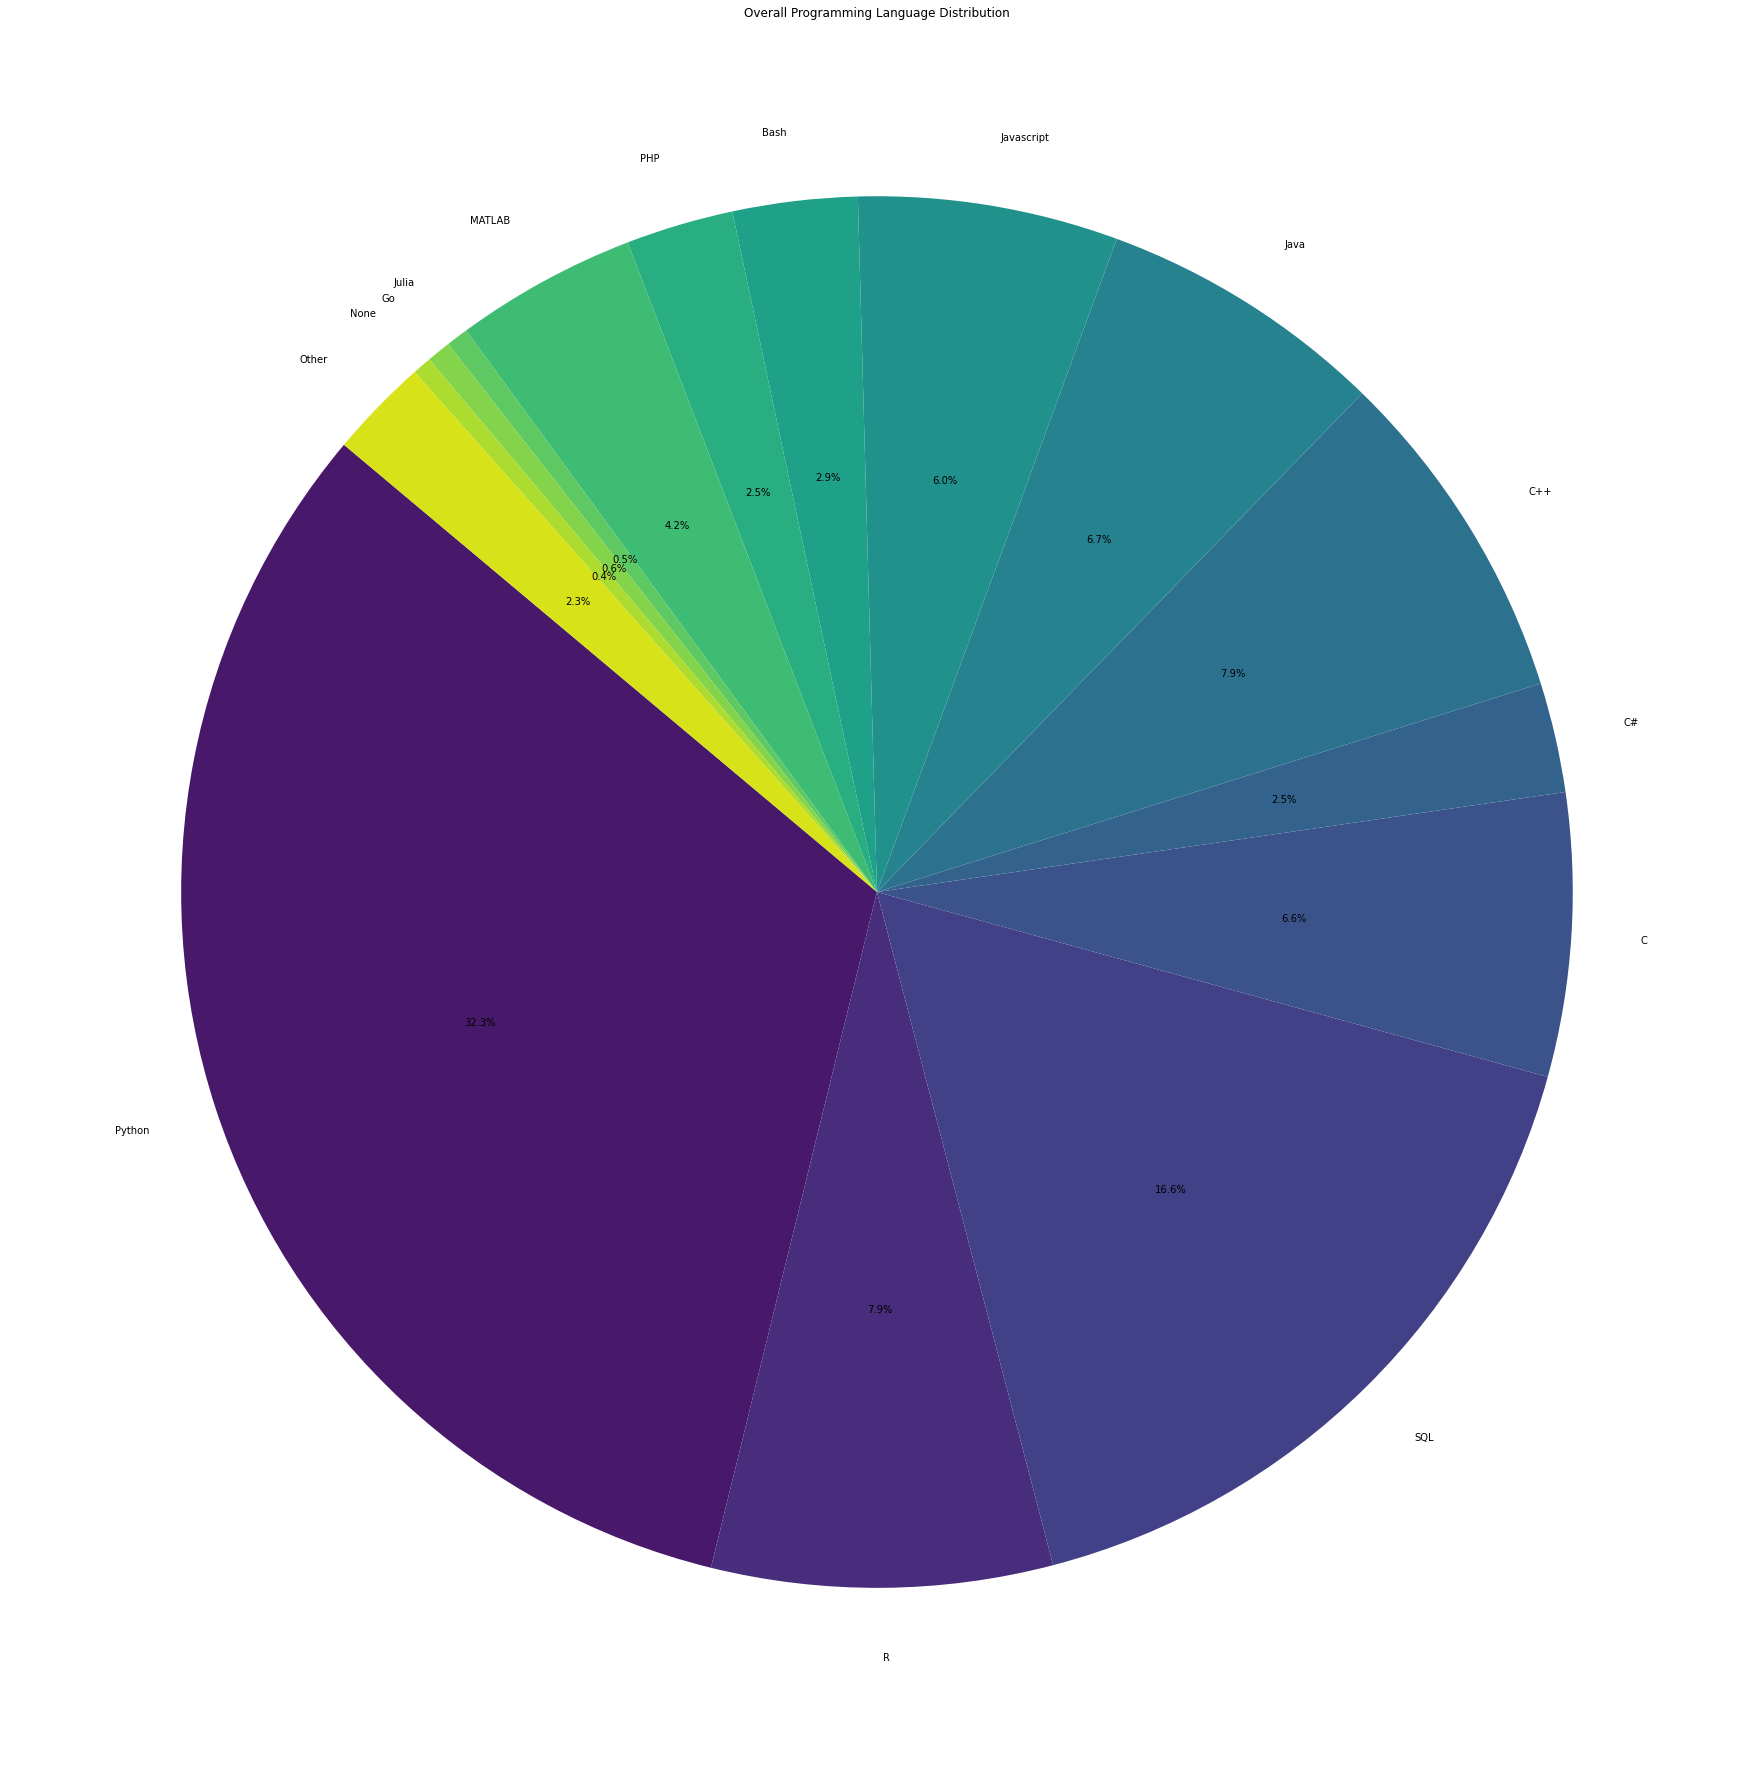

In [22]:
# Pie chart for overall language distribution
plt.figure(figsize=(32,32))
plt.pie(language_counts, labels=language_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("viridis", len(language_counts)))
plt.title("Overall Programming Language Distribution")
plt.show()

In [23]:
# sns.pairplot(df_languages)
# plt.suptitle("Pairplot of Programming Language Usage", y=1.02)
# plt.show()

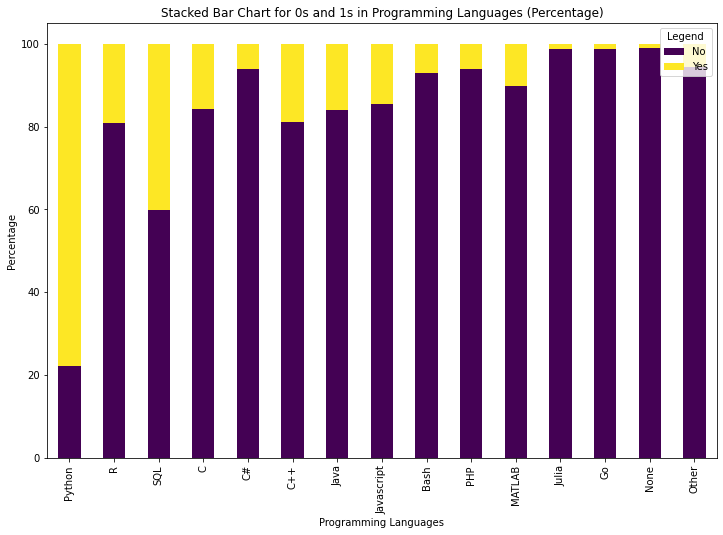

In [24]:
columns_to_plot = ['Python', 'R', 'SQL', 'C', 'C#', 'C++', 'Java', 'Javascript', 'Bash', 'PHP', 'MATLAB', 'Julia', 'Go', 'None', 'Other']
count_df = df_languages[columns_to_plot].apply(pd.Series.value_counts).T
count_df_percentage = count_df.div(count_df.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 8))
count_df_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)
plt.xlabel('Programming Languages')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart for 0s and 1s in Programming Languages (Percentage)')
ax.legend(['No', 'Yes'], title='Legend', loc='upper right')
plt.show()

# <center> What are the primary tools or platforms used by data scientists for their daily work?</center>

In [25]:
columns_to_combine = [
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - JupyterLab ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStudio ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode) ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  PyCharm ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Spyder  ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Notepad++  ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Sublime Text  ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Vim / Emacs  ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  MATLAB ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Jupyter Notebook",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - IntelliJ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - None",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other",   
'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Kaggle Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Colab Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Azure Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Code Ocean ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  IBM Watson Studio ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio Lab ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon EMR Notebooks ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Google Cloud Vertex AI Workbench ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Hex Workspaces',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Noteable Notebooks ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Databricks Collaborative Notebooks ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Deepnote Notebooks ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Gradient Notebooks ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - None',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Other',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Seaborn ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Plotly / Plotly Express ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2 ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Shiny ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  D3 js ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Altair ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Bokeh ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Geoplotlib ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Leaflet / Folium ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Pygal ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Dygraphs ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Highcharter ',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice - None',
 'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice - Other',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS) ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Microsoft Azure ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Oracle Cloud ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  SAP Cloud ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  VMware Cloud ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Alibaba Cloud ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Tencent Cloud ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Huawei Cloud ',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice - None',
 'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice - Other',
 'Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)? - Selected Choice',
 'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice -  Amazon Elastic Compute Cloud (EC2) ',
 'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice -  Microsoft Azure Virtual Machines ',
 'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice -  Google Cloud Compute Engine ',
 'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - No / None',
 'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - Other',
    
]

# Create a new DataFrame with only the specified columns
df_selected_columns = df[columns_to_combine].copy()

# Now df_selected_columns contains only the specified columns
df_selected_columns

,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - JupyterLab,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio Code (VSCode),Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,...,Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice - Tencent Cloud,Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice - Huawei Cloud,Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice - None,Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice - Other,"Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)? - Selected Choice",Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - Amazon Elastic Compute Cloud (EC2),Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - Microsoft Azure Virtual Machines,Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - Google Cloud Compute Engine,Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - No / None,Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JupyterLab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,Vim / Emacs,NaN,...,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,NaN,RStudio,NaN,Visual Studio Code (VSCode),PyCharm,NaN,Notepad++,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,PyCharm,Spyder,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN
23995,NaN,RStudio,NaN,NaN,PyCharm,NaN,Notepad++,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
column_mapping = {
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice - JupyterLab ': 'ide_JupyterLab',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStudio ': 'ide_RStudio',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio ': 'ide_VisualStudio',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode) ': 'ide_VSCode',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -  PyCharm ': 'ide_PyCharm',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Spyder  ': 'ide_Spyder',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Notepad++  ': 'ide_Notepad++',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Sublime Text  ': 'ide_SublimeText',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Vim / Emacs  ': 'ide_VimEmacs',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -  MATLAB ': 'ide_MATLAB',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Jupyter Notebook': 'ide_JupyterNotebook',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice - IntelliJ': 'ide_IntelliJ',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice - None': 'ide_None',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other': 'ide_Other',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Kaggle Notebooks': 'nb_Kaggle',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Colab Notebooks': 'nb_Colab',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Azure Notebooks': 'nb_Azure',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Code Ocean ': 'nb_CodeOcean',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  IBM Watson Studio ': 'nb_IBMWatsonStudio',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio ': 'nb_AmazonSagemakerStudio',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio Lab ': 'nb_AmazonSagemakerStudioLab',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon EMR Notebooks ': 'nb_AmazonEMRNotebooks',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Google Cloud Vertex AI Workbench ': 'nb_GoogleCloudVertexAIWorkbench',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Hex Workspaces': 'nb_HexWorkspaces',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Noteable Notebooks ': 'nb_NoteableNotebooks',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Databricks Collaborative Notebooks ': 'nb_DatabricksCollaborativeNotebooks',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Deepnote Notebooks ': 'nb_DeepnoteNotebooks',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Gradient Notebooks ': 'nb_GradientNotebooks',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - None': 'nb_None',
    'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Other': 'nb_Other',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib ': 'viz_Matplotlib',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Seaborn ': 'viz_Seaborn',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Plotly / Plotly Express ': 'viz_Plotly',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2 ': 'viz_Ggplot',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Shiny ': 'viz_Shiny',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  D3 js ': 'viz_D3js',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Altair ': 'viz_Altair',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Bokeh ': 'viz_Bokeh',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Geoplotlib ': 'viz_Geoplotlib',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Leaflet / Folium ': 'viz_LeafletFolium',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Pygal ': 'viz_Pygal',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Dygraphs ': 'viz_Dygraphs',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Highcharter ': 'viz_Highcharter',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice - None': 'viz_None',
    'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice - Other': 'viz_Other',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS) ': 'cloud_AWS',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Microsoft Azure ': 'cloud_Azure',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ': 'cloud_GCP',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat ': 'cloud_IBM',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Oracle Cloud ': 'cloud_Oracle',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  SAP Cloud ': 'cloud_SAP',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  VMware Cloud ': 'cloud_VMware',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Alibaba Cloud ': 'cloud_Alibaba',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Tencent Cloud ': 'cloud_Tencent',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Huawei Cloud ': 'cloud_Huawei',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice - None': 'cloud_None',
    'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice - Other': 'cloud_Other',
    'Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)? - Selected Choice': 'best_cloud_experience',
    'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice -  Amazon Elastic Compute Cloud (EC2) ': 'cloud_product_EC2',
    'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice -  Microsoft Azure Virtual Machines ': 'cloud_product_AzureVM',
    'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice -  Google Cloud Compute Engine ': 'cloud_product_GCPComputeEngine',
    'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - No / None': 'cloud_product_None',
    'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice - Other': 'cloud_product_Other'
}


df_primary_tools=rename_columns(df_selected_columns, column_mapping)
df_primary_tools

,ide_JupyterLab,ide_RStudio,ide_VisualStudio,ide_VSCode,ide_PyCharm,ide_Spyder,ide_Notepad++,ide_SublimeText,ide_VimEmacs,ide_MATLAB,...,cloud_Tencent,cloud_Huawei,cloud_None,cloud_Other,best_cloud_experience,cloud_product_EC2,cloud_product_AzureVM,cloud_product_GCPComputeEngine,cloud_product_None,cloud_product_Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JupyterLab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,Vim / Emacs,NaN,...,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,NaN,RStudio,NaN,Visual Studio Code (VSCode),PyCharm,NaN,Notepad++,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,NaN,NaN,NaN,NaN,PyCharm,Spyder,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN
23995,NaN,RStudio,NaN,NaN,PyCharm,NaN,Notepad++,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
salary_list = df_primary_tools.columns
salary_list

Index(['ide_JupyterLab', 'ide_RStudio', 'ide_VisualStudio', 'ide_VSCode',
       'ide_PyCharm', 'ide_Spyder', 'ide_Notepad++', 'ide_SublimeText',
       'ide_VimEmacs', 'ide_MATLAB', 'ide_JupyterNotebook', 'ide_IntelliJ',
       'ide_None', 'ide_Other', 'nb_Kaggle', 'nb_Colab', 'nb_Azure',
       'nb_CodeOcean', 'nb_IBMWatsonStudio', 'nb_AmazonSagemakerStudio',
       'nb_AmazonSagemakerStudioLab', 'nb_AmazonEMRNotebooks',
       'nb_GoogleCloudVertexAIWorkbench', 'nb_HexWorkspaces',
       'nb_NoteableNotebooks', 'nb_DatabricksCollaborativeNotebooks',
       'nb_DeepnoteNotebooks', 'nb_GradientNotebooks', 'nb_None', 'nb_Other',
       'viz_Matplotlib', 'viz_Seaborn', 'viz_Plotly', 'viz_Ggplot',
       'viz_Shiny', 'viz_D3js', 'viz_Altair', 'viz_Bokeh', 'viz_Geoplotlib',
       'viz_LeafletFolium', 'viz_Pygal', 'viz_Dygraphs', 'viz_Highcharter',
       'viz_None', 'viz_Other', 'cloud_AWS', 'cloud_Azure', 'cloud_GCP',
       'cloud_IBM', 'cloud_Oracle', 'cloud_SAP', 'cloud_VMware',
    

In [28]:
for i in salary_list:
    print(i,': ',df_primary_tools[i].unique())

ide_JupyterLab :  [nan 'JupyterLab ']
ide_RStudio :  [nan ' RStudio ']
ide_VisualStudio :  [nan ' Visual Studio ']
ide_VSCode :  [nan ' Visual Studio Code (VSCode) ']
ide_PyCharm :  [nan ' PyCharm ']
ide_Spyder :  [nan '  Spyder  ']
ide_Notepad++ :  [nan '  Notepad++  ']
ide_SublimeText :  [nan '  Sublime Text  ']
ide_VimEmacs :  [nan '  Vim / Emacs  ']
ide_MATLAB :  [nan ' MATLAB ']
ide_JupyterNotebook :  [nan ' Jupyter Notebook']
ide_IntelliJ :  [nan 'IntelliJ']
ide_None :  [nan 'None']
ide_Other :  [nan 'Other']
nb_Kaggle :  [nan ' Kaggle Notebooks']
nb_Colab :  [nan 'Colab Notebooks']
nb_Azure :  [nan 'Azure Notebooks']
nb_CodeOcean :  [nan ' Code Ocean ']
nb_IBMWatsonStudio :  [nan ' IBM Watson Studio ']
nb_AmazonSagemakerStudio :  [nan ' Amazon Sagemaker Studio ']
nb_AmazonSagemakerStudioLab :  [nan ' Amazon Sagemaker Studio Lab ']
nb_AmazonEMRNotebooks :  [nan ' Amazon EMR Notebooks ']
nb_GoogleCloudVertexAIWorkbench :  [nan 'Google Cloud Vertex AI Workbench ']
nb_HexWorkspaces 

In [29]:
df_primary_tools.fillna(0, inplace=True)

In [30]:
# List of columns to apply the function to
columns_to_process = ['ide_JupyterLab', 'ide_RStudio', 'ide_VisualStudio', 'ide_VSCode',
       'ide_PyCharm', 'ide_Spyder', 'ide_Notepad++', 'ide_SublimeText',
       'ide_VimEmacs', 'ide_MATLAB', 'ide_JupyterNotebook', 'ide_IntelliJ',
       'ide_None', 'ide_Other', 'nb_Kaggle', 'nb_Colab', 'nb_Azure',
       'nb_CodeOcean', 'nb_IBMWatsonStudio', 'nb_AmazonSagemakerStudio',
       'nb_AmazonSagemakerStudioLab', 'nb_AmazonEMRNotebooks',
       'nb_GoogleCloudVertexAIWorkbench', 'nb_HexWorkspaces',
       'nb_NoteableNotebooks', 'nb_DatabricksCollaborativeNotebooks',
       'nb_DeepnoteNotebooks', 'nb_GradientNotebooks', 'nb_None', 'nb_Other',
       'viz_Matplotlib', 'viz_Seaborn', 'viz_Plotly', 'viz_Ggplot',
       'viz_Shiny', 'viz_D3js', 'viz_Altair', 'viz_Bokeh', 'viz_Geoplotlib',
       'viz_LeafletFolium', 'viz_Pygal', 'viz_Dygraphs', 'viz_Highcharter',
       'viz_None', 'viz_Other', 'cloud_AWS', 'cloud_Azure', 'cloud_GCP',
       'cloud_IBM', 'cloud_Oracle', 'cloud_SAP', 'cloud_VMware',
       'cloud_Alibaba', 'cloud_Tencent', 'cloud_Huawei', 'cloud_None',
       'cloud_Other', 'best_cloud_experience', 'cloud_product_EC2',
       'cloud_product_AzureVM', 'cloud_product_GCPComputeEngine',
       'cloud_product_None', 'cloud_product_Other']

# Apply the function only to the specified columns
df_primary_tools[columns_to_process] = df_primary_tools[columns_to_process].applymap(replace_non_zero)
df_primary_tools

,ide_JupyterLab,ide_RStudio,ide_VisualStudio,ide_VSCode,ide_PyCharm,ide_Spyder,ide_Notepad++,ide_SublimeText,ide_VimEmacs,ide_MATLAB,...,cloud_Tencent,cloud_Huawei,cloud_None,cloud_Other,best_cloud_experience,cloud_product_EC2,cloud_product_AzureVM,cloud_product_GCPComputeEngine,cloud_product_None,cloud_product_Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23994,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23995,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
for i in salary_list:
    print(i,': ',df_primary_tools[i].unique())

ide_JupyterLab :  [0 1]
ide_RStudio :  [0 1]
ide_VisualStudio :  [0 1]
ide_VSCode :  [0 1]
ide_PyCharm :  [0 1]
ide_Spyder :  [0 1]
ide_Notepad++ :  [0 1]
ide_SublimeText :  [0 1]
ide_VimEmacs :  [0 1]
ide_MATLAB :  [0 1]
ide_JupyterNotebook :  [0 1]
ide_IntelliJ :  [0 1]
ide_None :  [0 1]
ide_Other :  [0 1]
nb_Kaggle :  [0 1]
nb_Colab :  [0 1]
nb_Azure :  [0 1]
nb_CodeOcean :  [0 1]
nb_IBMWatsonStudio :  [0 1]
nb_AmazonSagemakerStudio :  [0 1]
nb_AmazonSagemakerStudioLab :  [0 1]
nb_AmazonEMRNotebooks :  [0 1]
nb_GoogleCloudVertexAIWorkbench :  [0 1]
nb_HexWorkspaces :  [0 1]
nb_NoteableNotebooks :  [0 1]
nb_DatabricksCollaborativeNotebooks :  [0 1]
nb_DeepnoteNotebooks :  [0 1]
nb_GradientNotebooks :  [0 1]
nb_None :  [0 1]
nb_Other :  [0 1]
viz_Matplotlib :  [0 1]
viz_Seaborn :  [0 1]
viz_Plotly :  [0 1]
viz_Ggplot :  [0 1]
viz_Shiny :  [0 1]
viz_D3js :  [0 1]
viz_Altair :  [0 1]
viz_Bokeh :  [0 1]
viz_Geoplotlib :  [0 1]
viz_LeafletFolium :  [0 1]
viz_Pygal :  [0 1]
viz_Dygraphs : 

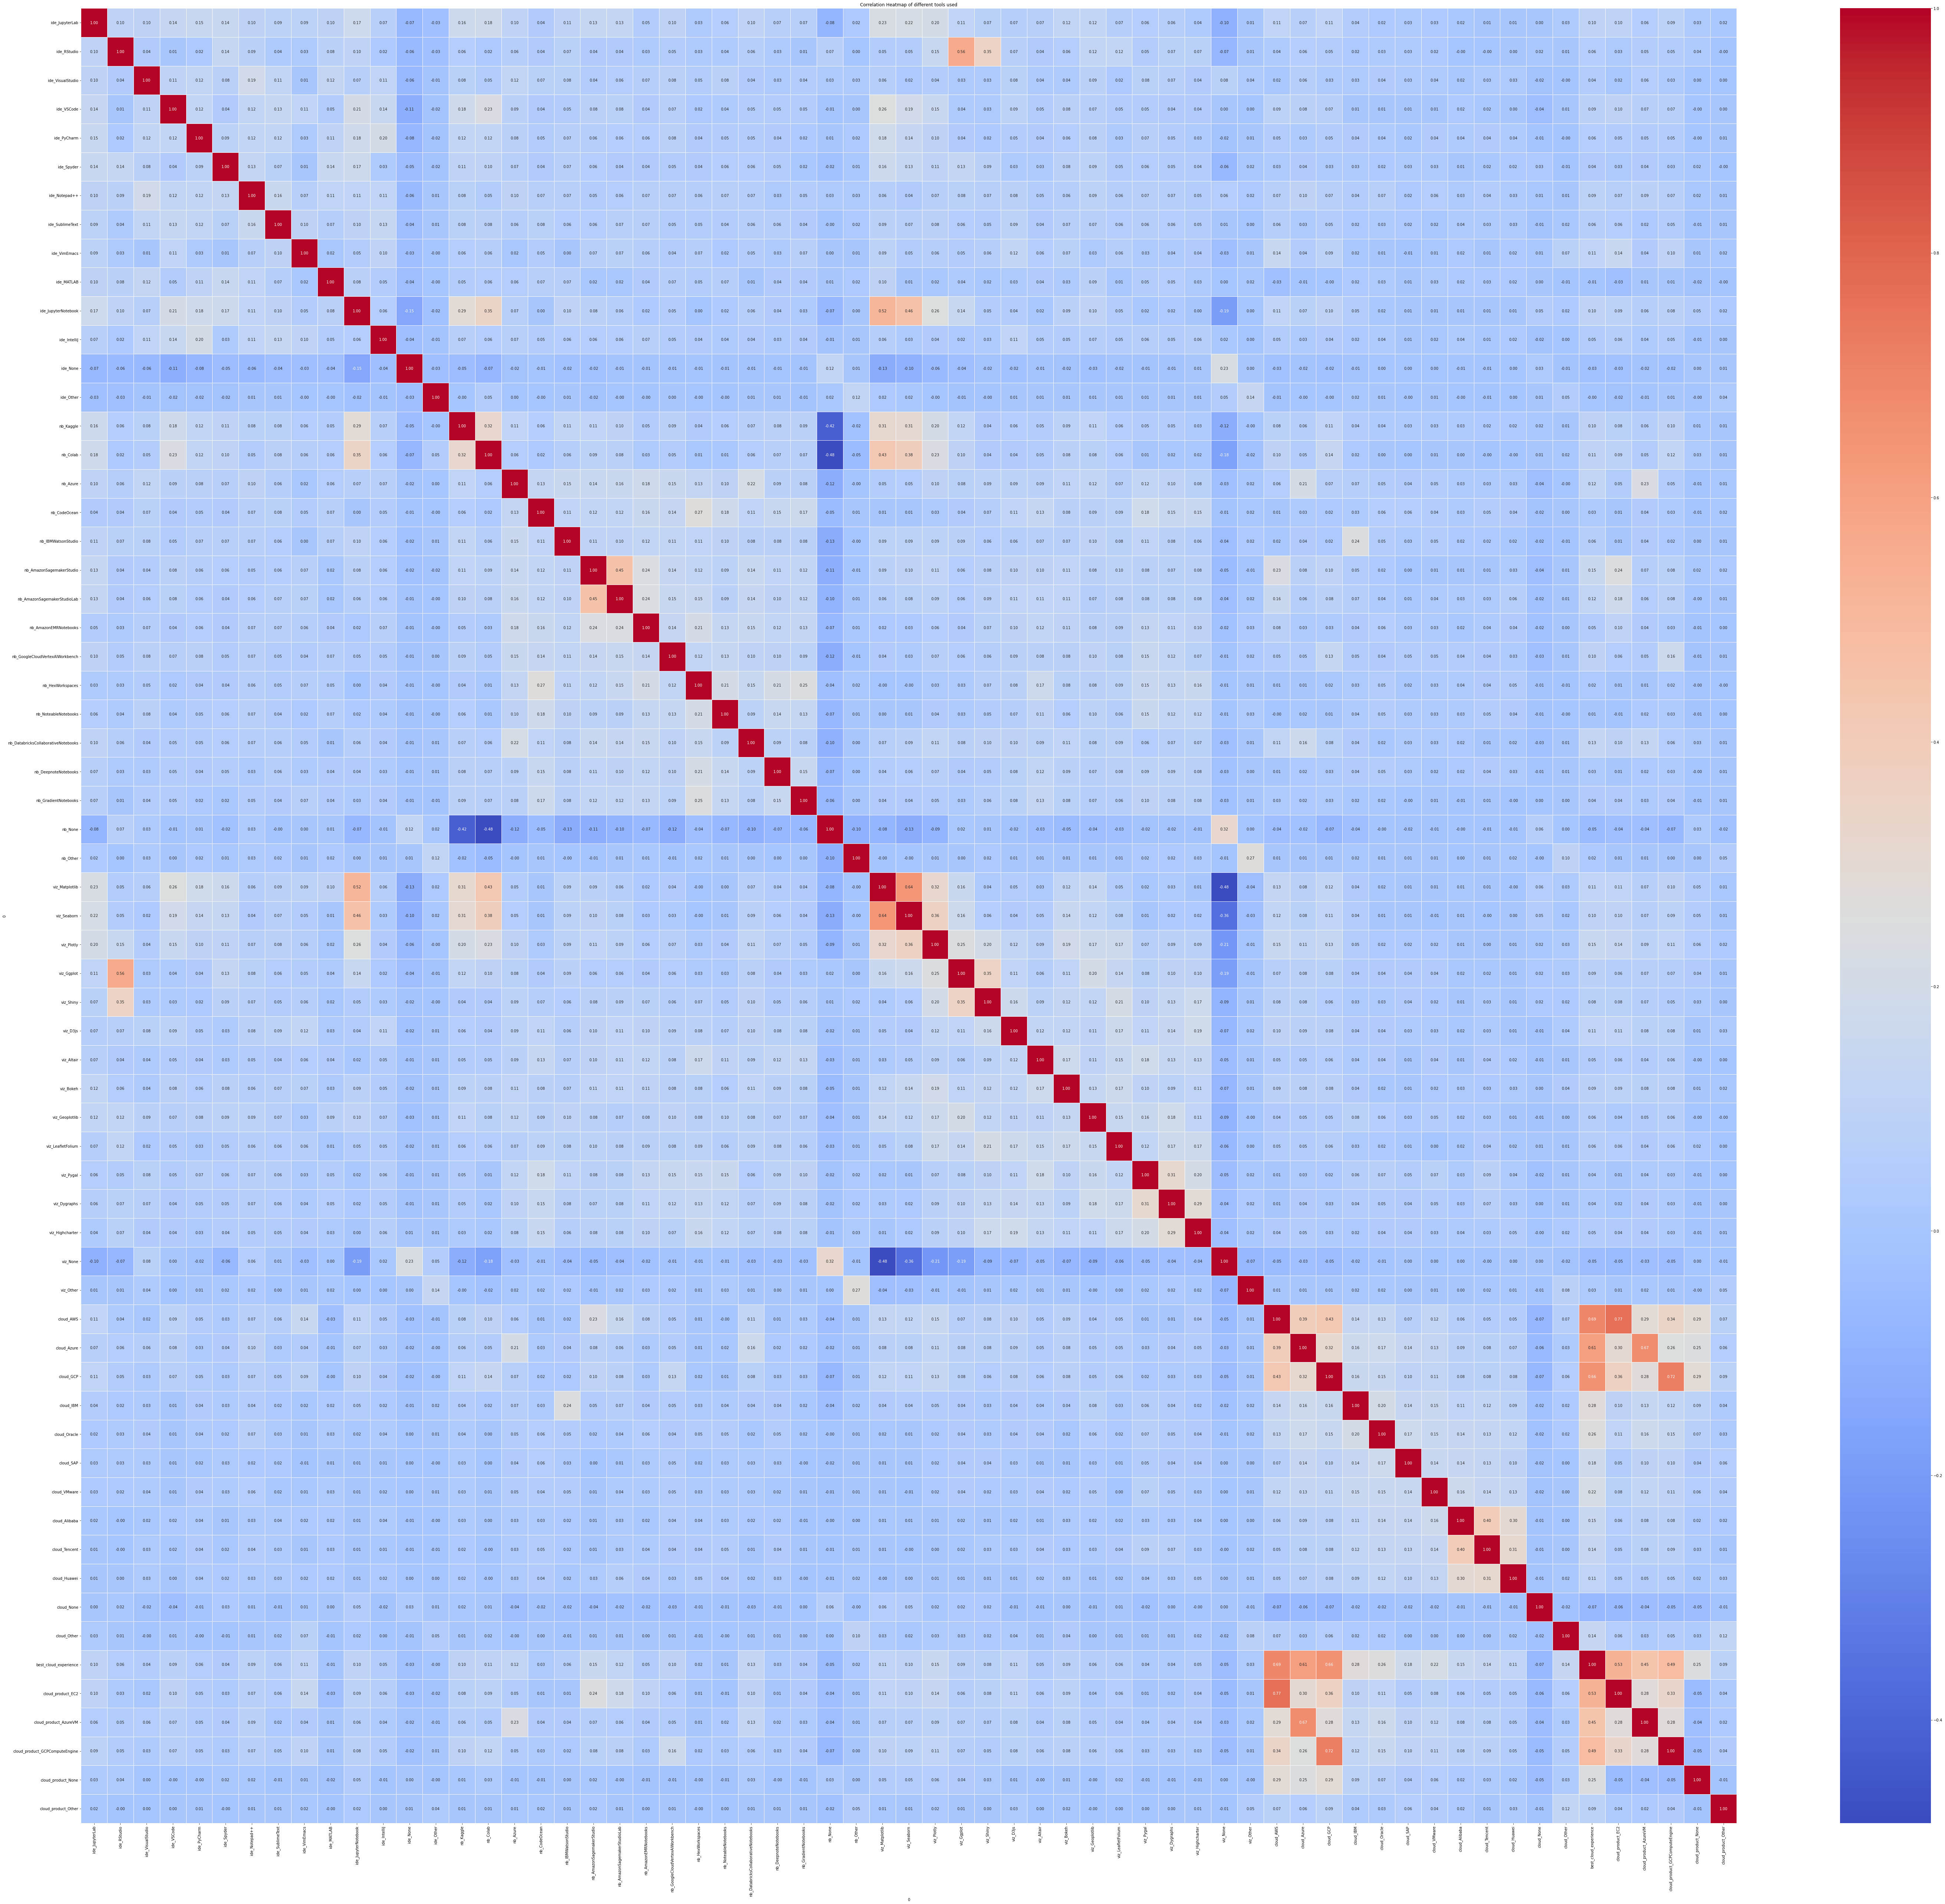

In [32]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df_primary_tools.copy()

# Label encode string columns
le = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  # Check if the column contains string values
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(100, 90))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of different tools used')
plt.show()

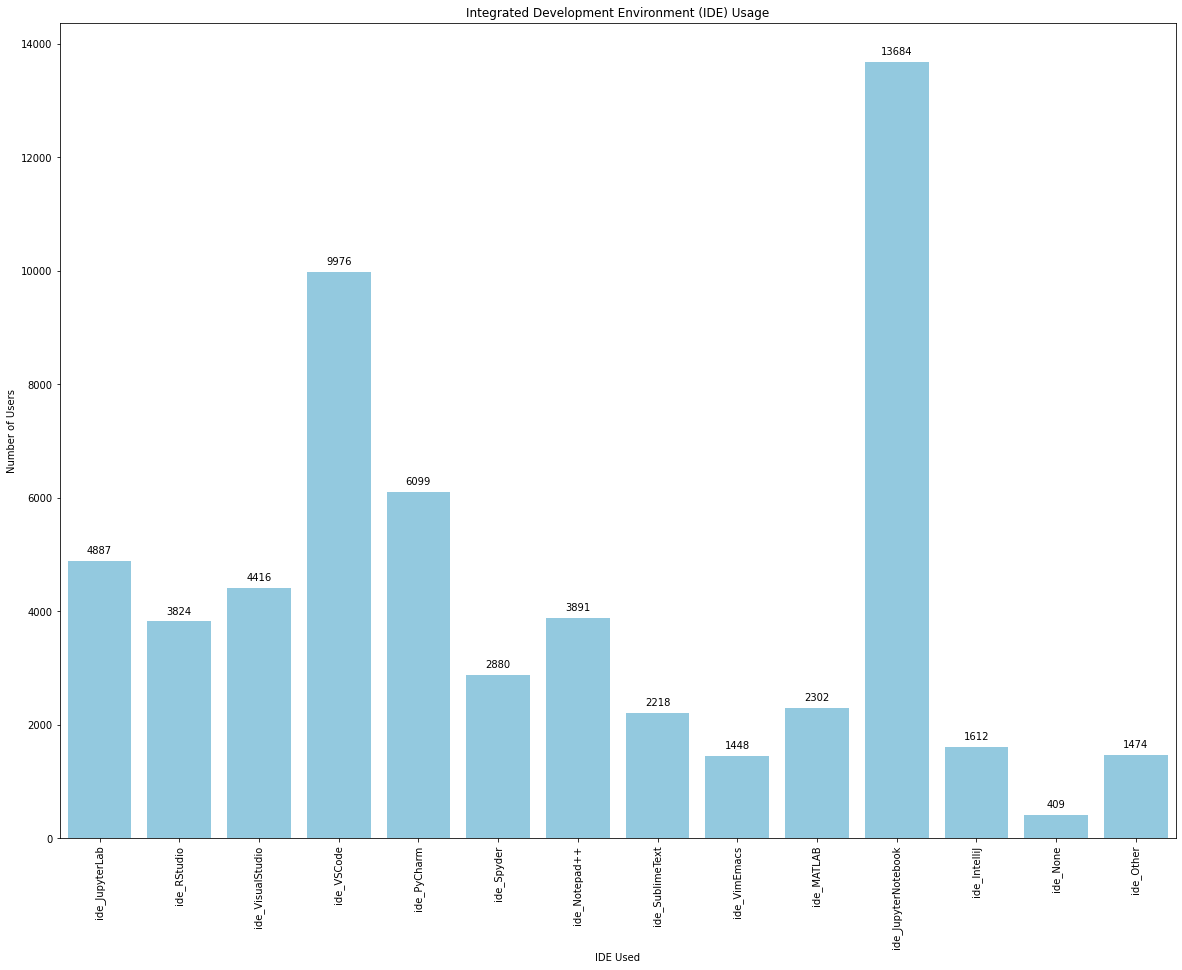

In [33]:
columns_to_plot_2 = ['ide_JupyterLab', 'ide_RStudio', 'ide_VisualStudio', 'ide_VSCode',
                     'ide_PyCharm', 'ide_Spyder', 'ide_Notepad++', 'ide_SublimeText',
                     'ide_VimEmacs', 'ide_MATLAB', 'ide_JupyterNotebook', 'ide_IntelliJ',
                     'ide_None', 'ide_Other']

plot_bar_chart(df_primary_tools, columns_to_plot_2, "Integrated Development Environment (IDE) Usage","IDE Used")

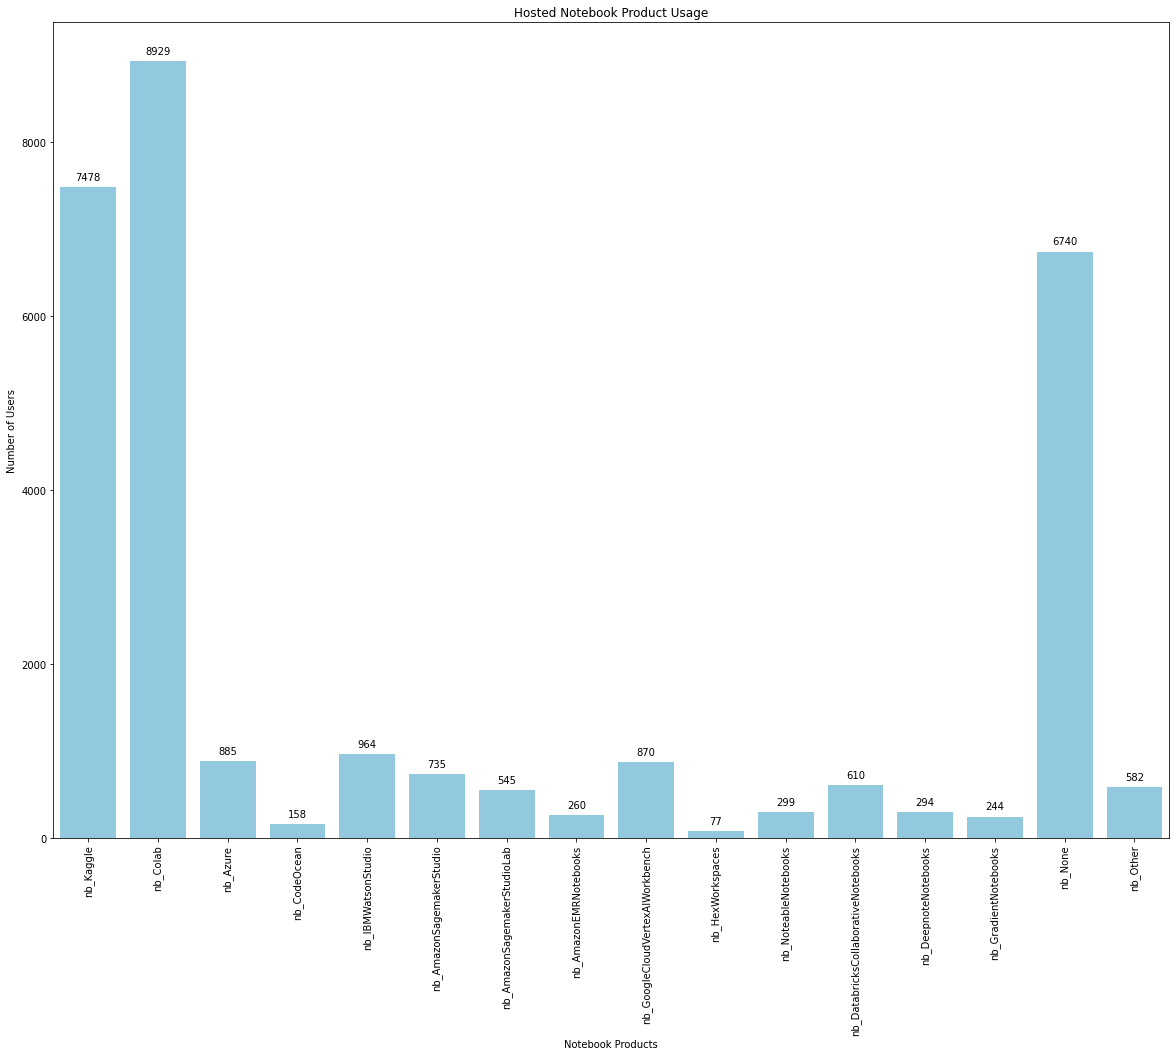

In [34]:
columns_to_plot_3 = ['nb_Kaggle', 'nb_Colab', 'nb_Azure',
                     'nb_CodeOcean', 'nb_IBMWatsonStudio', 'nb_AmazonSagemakerStudio',
                     'nb_AmazonSagemakerStudioLab', 'nb_AmazonEMRNotebooks',
                     'nb_GoogleCloudVertexAIWorkbench', 'nb_HexWorkspaces',
                     'nb_NoteableNotebooks', 'nb_DatabricksCollaborativeNotebooks',
                     'nb_DeepnoteNotebooks', 'nb_GradientNotebooks', 'nb_None', 'nb_Other', ]

plot_bar_chart(df_primary_tools, columns_to_plot_3, "Hosted Notebook Product Usage","Notebook Products")


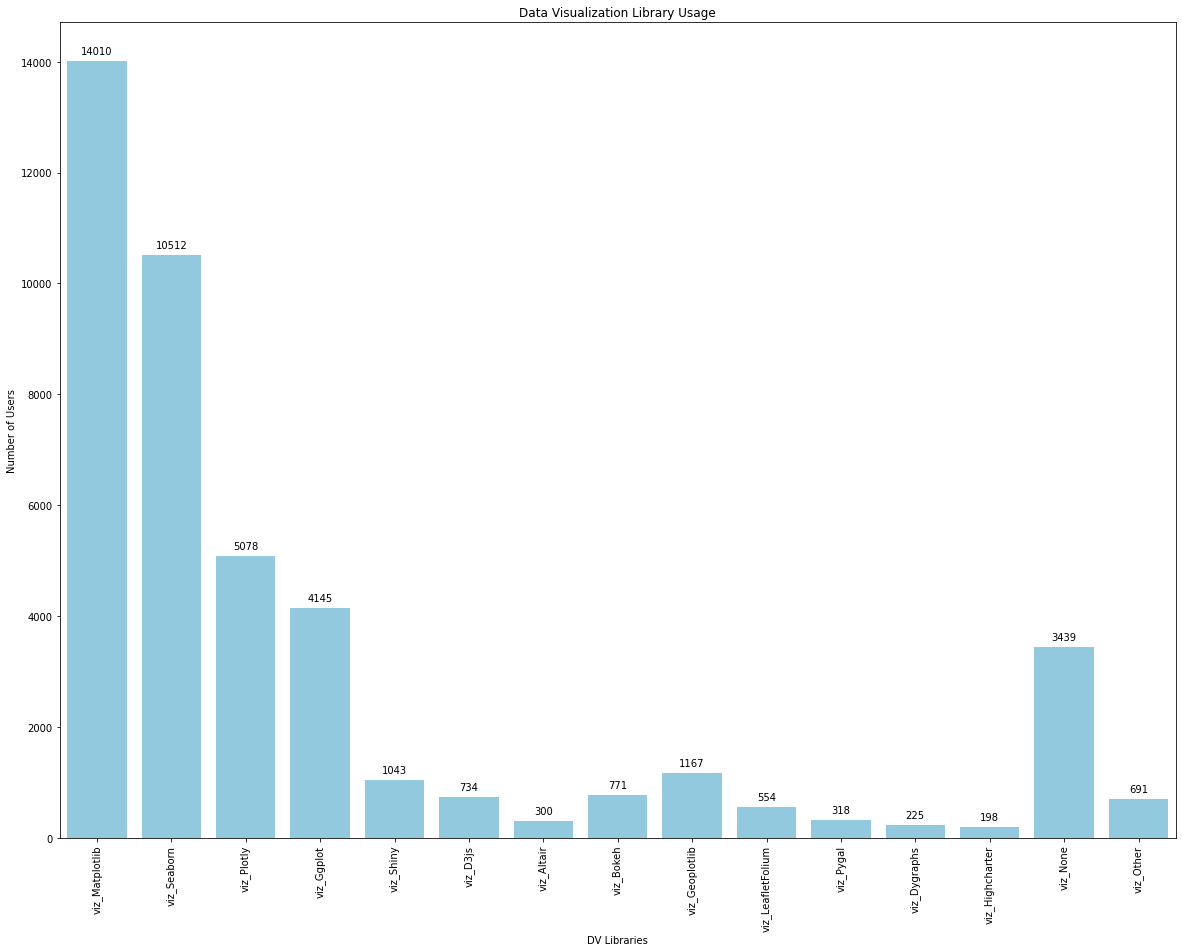

In [35]:
columns_to_plot_4 = ['viz_Matplotlib', 'viz_Seaborn', 'viz_Plotly', 'viz_Ggplot',
                     'viz_Shiny', 'viz_D3js', 'viz_Altair', 'viz_Bokeh', 'viz_Geoplotlib',
                     'viz_LeafletFolium', 'viz_Pygal', 'viz_Dygraphs', 'viz_Highcharter',
                     'viz_None', 'viz_Other', ]

plot_bar_chart(df_primary_tools, columns_to_plot_4, "Data Visualization Library Usage","DV Libraries")


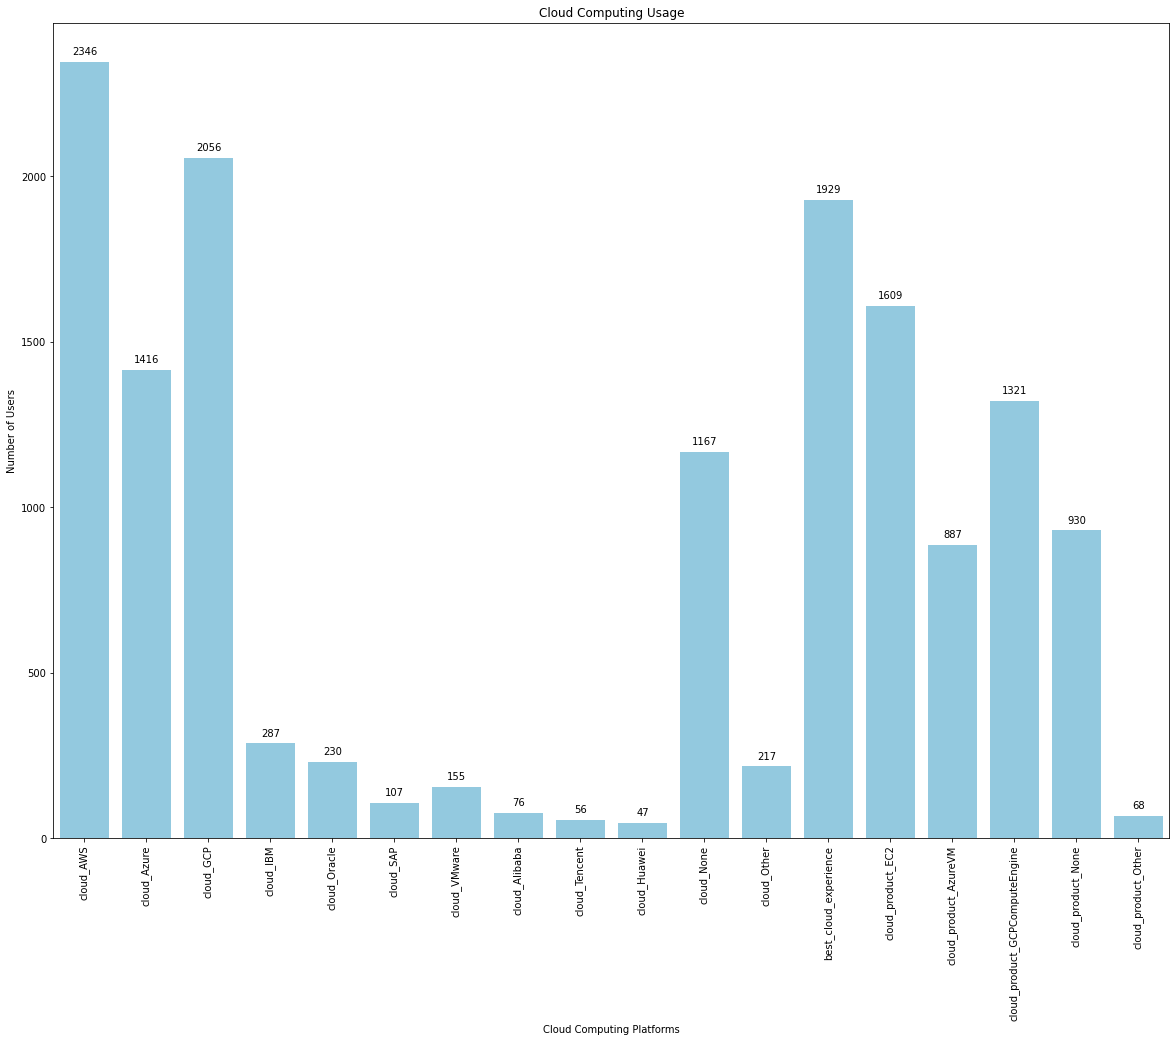

In [36]:
columns_to_plot_5 = ['cloud_AWS', 'cloud_Azure', 'cloud_GCP',
                     'cloud_IBM', 'cloud_Oracle', 'cloud_SAP', 'cloud_VMware',
                     'cloud_Alibaba', 'cloud_Tencent', 'cloud_Huawei', 'cloud_None',
                     'cloud_Other', 'best_cloud_experience', 'cloud_product_EC2',
                     'cloud_product_AzureVM', 'cloud_product_GCPComputeEngine',
                     'cloud_product_None', 'cloud_product_Other']

plot_bar_chart(df_primary_tools, columns_to_plot_5, "Cloud Computing Usage","Cloud Computing Platforms")

C:\Users\Admin\AppData\Local\Temp\ipykernel_16448\283790049.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sum_IDE'] = df_selected[ide_columns].sum(axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16448\283790049.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sum_Notebook'] = df_selected[notebook_columns].sum(axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16448\283790049.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

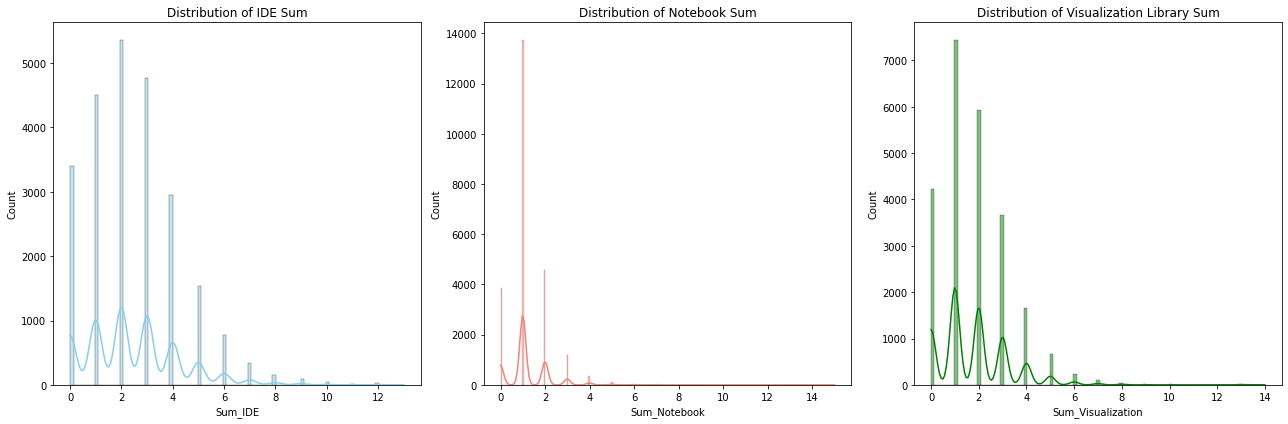

In [37]:
# Select columns related to IDE
ide_columns = [
    'ide_JupyterLab', 'ide_RStudio', 'ide_VisualStudio', 'ide_VSCode',
    'ide_PyCharm', 'ide_Spyder', 'ide_Notepad++', 'ide_SublimeText',
    'ide_VimEmacs', 'ide_MATLAB', 'ide_JupyterNotebook', 'ide_IntelliJ',
    'ide_None', 'ide_Other'
]

# Select columns related to Notebook
notebook_columns = [
    'nb_Kaggle', 'nb_Colab', 'nb_Azure',
    'nb_CodeOcean', 'nb_IBMWatsonStudio', 'nb_AmazonSagemakerStudio',
    'nb_AmazonSagemakerStudioLab', 'nb_AmazonEMRNotebooks',
    'nb_GoogleCloudVertexAIWorkbench', 'nb_HexWorkspaces',
    'nb_NoteableNotebooks', 'nb_DatabricksCollaborativeNotebooks',
    'nb_DeepnoteNotebooks', 'nb_GradientNotebooks', 'nb_None', 'nb_Other'
]

# Select columns related to Visualization Libraries
viz_columns = [
    'viz_Matplotlib', 'viz_Seaborn', 'viz_Plotly', 'viz_Ggplot',
    'viz_Shiny', 'viz_D3js', 'viz_Altair', 'viz_Bokeh', 'viz_Geoplotlib',
    'viz_LeafletFolium', 'viz_Pygal', 'viz_Dygraphs', 'viz_Highcharter',
    'viz_None', 'viz_Other'
]

# Create a new DataFrame with the selected columns
df_selected = df_primary_tools[ide_columns + notebook_columns + viz_columns]

# Calculate the sum of each category
df_selected['Sum_IDE'] = df_selected[ide_columns].sum(axis=1)
df_selected['Sum_Notebook'] = df_selected[notebook_columns].sum(axis=1)
df_selected['Sum_Visualization'] = df_selected[viz_columns].sum(axis=1)

# Create histograms to visualize the distribution
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_selected['Sum_IDE'], kde=True, color='skyblue')
plt.title('Distribution of IDE Sum')

plt.subplot(1, 3, 2)
sns.histplot(df_selected['Sum_Notebook'], kde=True, color='salmon')
plt.title('Distribution of Notebook Sum')

plt.subplot(1, 3, 3)
sns.histplot(df_selected['Sum_Visualization'], kde=True, color='green')
plt.title('Distribution of Visualization Library Sum')

plt.tight_layout()
plt.show()

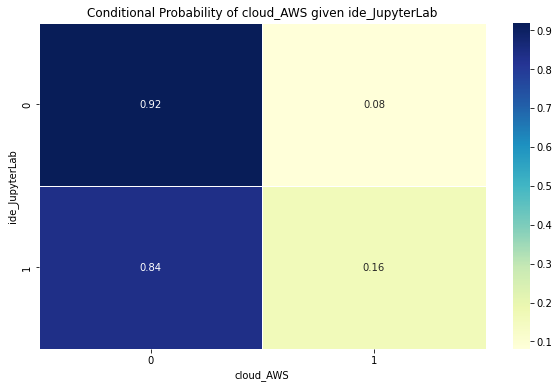

In [38]:
# Select columns for conditional probability
selected_ide_column = 'ide_JupyterLab'
selected_cloud_column = 'cloud_AWS'

# Calculate conditional probability
conditional_prob_df = df_primary_tools.groupby(selected_ide_column)[selected_cloud_column].value_counts(normalize=True).unstack()

# Plot the conditional probability heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conditional_prob_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title(f'Conditional Probability of {selected_cloud_column} given {selected_ide_column}')
plt.xlabel(selected_cloud_column)
plt.ylabel(selected_ide_column)
plt.show()


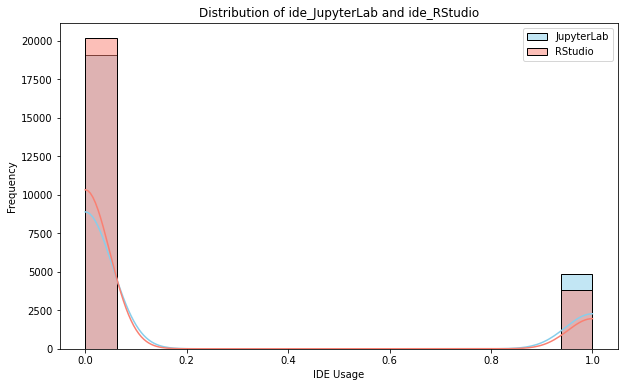

T-Statistic: 12.60955014459238
P-Value: 2.136781067466645e-36
Reject the null hypothesis. There is a significant difference in the mean usage of JupyterLab and RStudio.


In [39]:
# Select columns for the hypothesis test
ide_jupyterlab_column = 'ide_JupyterLab'
ide_rstudio_column = 'ide_RStudio'

# Plot the distribution of each group
plt.figure(figsize=(10, 6))
sns.histplot(df_primary_tools[ide_jupyterlab_column], kde=True, label='JupyterLab', color='skyblue')
sns.histplot(df_primary_tools[ide_rstudio_column], kde=True, label='RStudio', color='salmon')
plt.title(f'Distribution of {ide_jupyterlab_column} and {ide_rstudio_column}')
plt.xlabel('IDE Usage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Perform a t-test for independent samples
t_stat, p_value = ttest_ind(df_primary_tools[ide_jupyterlab_column], df_primary_tools[ide_rstudio_column])

# Print the results of the hypothesis test
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean usage of JupyterLab and RStudio.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean usage of JupyterLab and RStudio.")


# <center> Is there a relationship between years of experience and the adoption of machine learning techniques?</center>

In [40]:
columns_to_combine = [
    'For how many years have you been writing code and/or programming?',
    'Does your current employer incorporate machine learning methods into their business?',
]

# Create a new DataFrame with only the specified columns
df_selected_columns = df[columns_to_combine].copy()

# Now df_selected_columns contains only the specified columns
df_selected_columns

,For how many years have you been writing code and/or programming?,Does your current employer incorporate machine learning methods into their business?
0,NaN,NaN
1,1-3 years,NaN
2,1-3 years,NaN
3,10-20 years,"We recently started using ML methods (i.e., mo..."
4,5-10 years,NaN
...,...,...
23992,3-5 years,NaN
23993,20+ years,NaN
23994,< 1 years,No (we do not use ML methods)
23995,3-5 years,"We recently started using ML methods (i.e., mo..."


In [41]:
column_rename_dict = {
    'For how many years have you been writing code and/or programming?': 'coding_experience_years',
    'Does your current employer incorporate machine learning methods into their business?': 'employer_ml_incorporation',
}

df_exp=rename_columns(df_selected_columns, column_rename_dict)
df_exp

,coding_experience_years,employer_ml_incorporation
0,NaN,NaN
1,1-3 years,NaN
2,1-3 years,NaN
3,10-20 years,"We recently started using ML methods (i.e., mo..."
4,5-10 years,NaN
...,...,...
23992,3-5 years,NaN
23993,20+ years,NaN
23994,< 1 years,No (we do not use ML methods)
23995,3-5 years,"We recently started using ML methods (i.e., mo..."


In [42]:
exp_list = df_exp.columns
print(exp_list,'\n')
for i in exp_list:
    print(i,': ',df_exp[i].unique())

Index(['coding_experience_years', 'employer_ml_incorporation'], dtype='object', name=0) 

coding_experience_years :  [nan '1-3 years' '10-20 years' '5-10 years' '20+ years' '3-5 years'
 '< 1 years' 'I have never written code']
employer_ml_incorporation :  [nan
 'We recently started using ML methods (i.e., models in production for less than 2 years)'
 'We have well established ML methods (i.e., models in production for more than 2 years)'
 'We are exploring ML methods (and may one day put a model into production)'
 'I do not know'
 'We use ML methods for generating insights (but do not put working models into production)'
 'No (we do not use ML methods)']


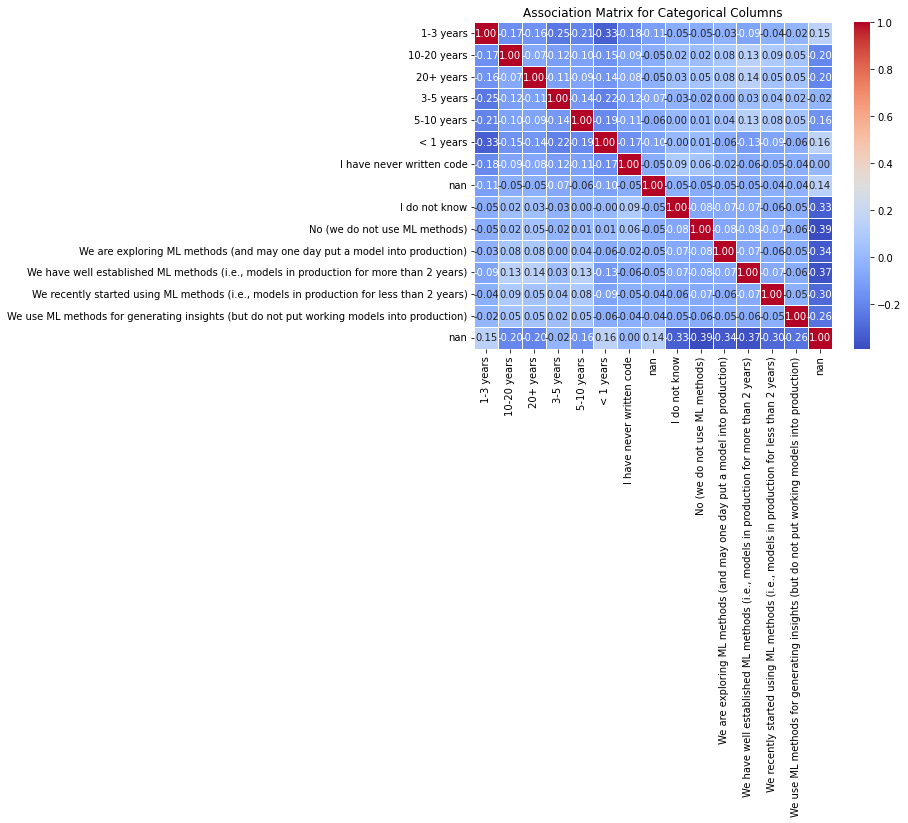

In [43]:
df_exp = df_exp.astype(str)

# Create a matrix of association between unique values
association_matrix = pd.get_dummies(df_exp, prefix='', prefix_sep='').corr()

# Plot the association matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(association_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Association Matrix for Categorical Columns')
plt.show()

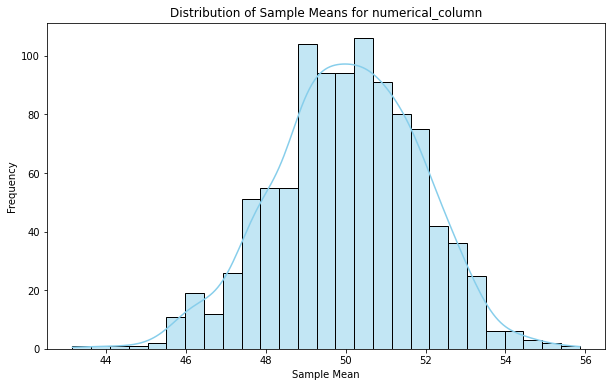

In [44]:
np.random.seed(42)
df_exp['numerical_column'] = np.random.normal(loc=50, scale=10, size=len(df_exp))

# Specify the column for analysis
numerical_column = 'numerical_column'

# Create a list to store sample means
sample_means = []

# Simulate the sampling process
num_samples = 1000
sample_size = 30  # Adjust sample size as needed
for _ in range(num_samples):
    sample = np.random.choice(df_exp[numerical_column].dropna(), size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='skyblue')
plt.title(f'Distribution of Sample Means for {numerical_column}')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

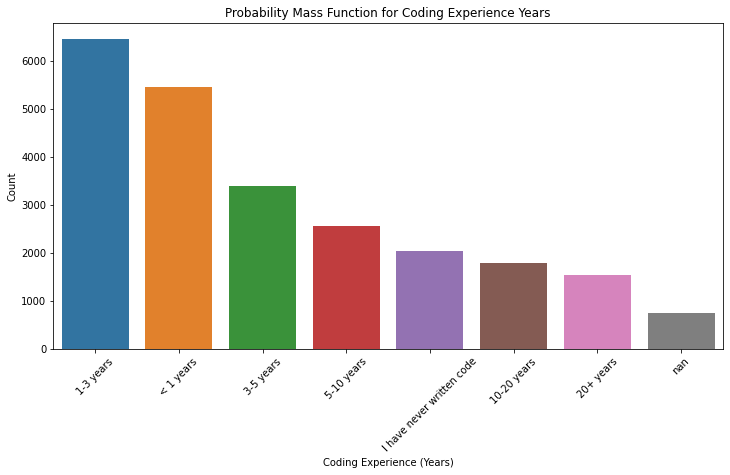

In [45]:
# Plotting Probability Mass Function (PMF) for 'coding_experience_years'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_exp, x='coding_experience_years', order=df_exp['coding_experience_years'].value_counts().index)
plt.title('Probability Mass Function for Coding Experience Years')
plt.xlabel('Coding Experience (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

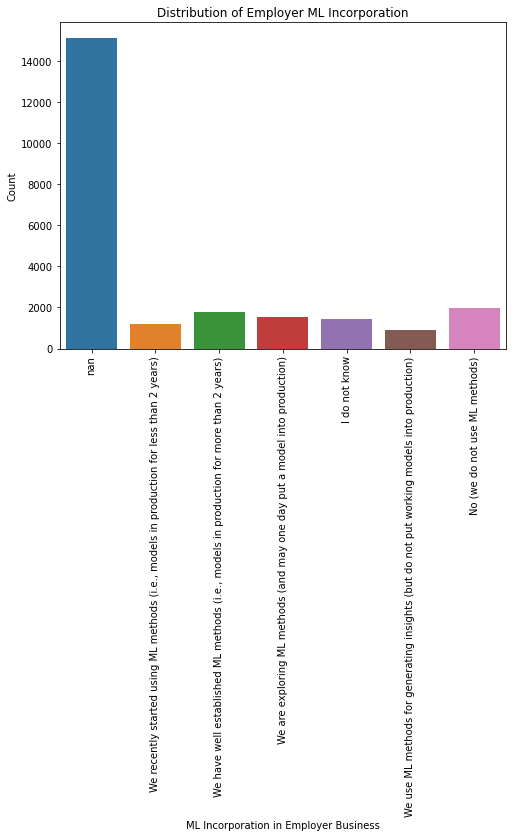

In [46]:
# Plotting bar plot for 'employer_ml_incorporation'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_exp, x='employer_ml_incorporation')
plt.title('Distribution of Employer ML Incorporation')
plt.xlabel('ML Incorporation in Employer Business')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Assuming there's a numerical column 'numerical_column' in your DataFrame
numerical_column = 'numerical_column'  # Replace with the actual numerical column name
print(df_exp[numerical_column].describe())

count    23997.000000
mean        50.018313
std         10.006667
min         10.775997
25%         43.270128
50%         50.019129
75%         56.778753
max         94.790843
Name: numerical_column, dtype: float64


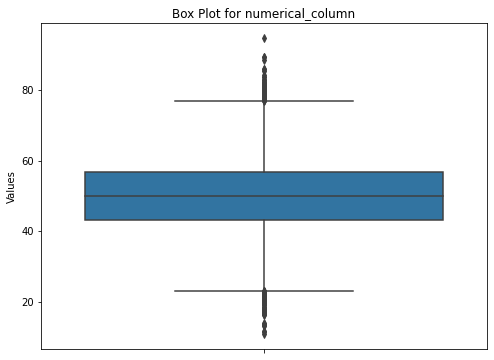

In [48]:
# Box plot for outliers (assuming 'numerical_column' is a numerical column)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_exp, y=numerical_column)
plt.title(f'Box Plot for {numerical_column}')
plt.ylabel('Values')
plt.show()


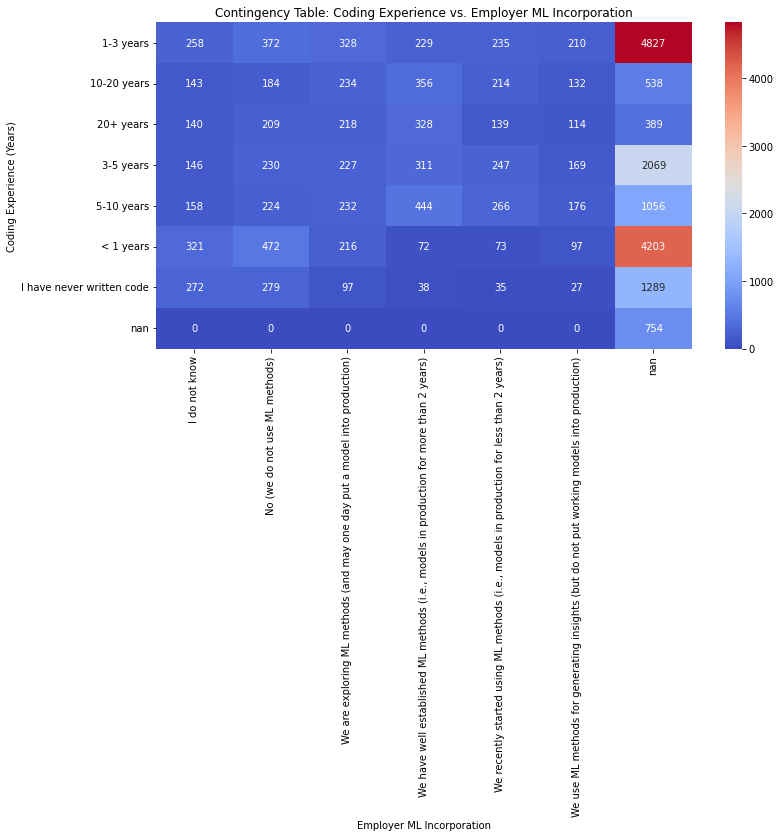

Chi-square value: 4964.092041287473
P-value: 0.0
Reject the null hypothesis: There is a significant association between coding experience and employer ML incorporation.


In [49]:
# Create a contingency table
contingency_table = pd.crosstab(df_exp['coding_experience_years'], df_exp['employer_ml_incorporation'])

# Visualize the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Table: Coding Experience vs. Employer ML Incorporation')
plt.xlabel('Employer ML Incorporation')
plt.ylabel('Coding Experience (Years)')
plt.show()

# Perform the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2}')
print(f'P-value: {p}')

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between coding experience and employer ML incorporation.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between coding experience and employer ML incorporation.")